# Housing Price Prediction Using Machine Learning Models

# Content 
- **[Introduction](#section1)**
    - **[Literate review](#section2)**
    - **[Research question](#section3)**
    - **[Data sourse and methods](#section4)**
- **[EDA](#section6)**
    - **[Libraries and summary](#section7)**
    - **[Boxplots](#section8)**
    - **[Histograms](#section9)**
    - **[Heatmap](#section10)**
- **[Data preparation](#section11)**
    - **[Drop missing values](#section12)**
    - **[Outliers](#section13)**
    - **[Encoding](#section14)**
    - **[PCA](#section15)**
    - **[Defining a target](#section141)**
    - **[Data scalling](#section142)**
    - **[Data splitting](#section143)**
- **[Hyperparameter Tuning](#section151)**
- **[Multiple linear Regression](#section16)**
- **[Decision Tree (Classifier)](#section18)**
- **[Decision Tree (Regressor)](#section19)**
- **[Support Vector Machine](#section20)**
- **[Random forest (Categoric target)](#section21)**
- **[Random forest (Numerical target)](#section22)**
- **[K-nearest neighbors](#section23)**
- **[References](#section99)**

***

 
<a id="section1"></a>
# Introduction
 
The main problem which may be associated with Ireland’s economy is currently experiencing a severe housing crisis. Housing prices are a big part of a country's economy and affect many other sectors. This issue has deep roots, as was mentioned by Nowlan (2016) and Scuffil (2022), this crisis is going back to the 1900s.

Lyons, R. (2018) point out that the property market is a regular topic of national attention in Ireland. For the majority of house owners, their house is the most valuable asset.

Ireland's economy has been suffering from one of the most severe housing busts of the global financial crisis (Norris and Byrne M. (2017), however in recent years been represented as having recovered economically (Nowicki et al., 2019). Since 2013, Irish house prices have increased by 50%, while rent rates have grown by over 60% according to Byrne M. (2020).

The pricing of houses is affected by many different factors, such as the location of the house, the features of the house and condition Phan, T. (2019).

Many factors may affect the prices of housing. These factors, as well as other parameters such as the materials used for the building, number of bedrooms, living area, location, upcoming projects and proximity were noted by Bourassa, Cantoni and Hoesli (2011).

The prediction of housing sale price may be considered an essential economic metric. The value of a house that grows with time requires the estimated value to be calculated as this value is required for sale, purchase or even mortgage. (Shinde and Gawande, 2018).
 
***
 
<a id="section2"></a>
## Literate review
Before getting started, we should investigate recent research, methods and results. It will help us to understand which methods we can use and which results we should expect.

1. Aswin (2017) applied 6 different machine learning models to predict house prices in a data set with 2000 records and 10 features. The author used 6 machine learning algorithms, such as Random Forest, Neural Networks, Gradient Boosted, Bagging, Support Vector Machine and Multiple Regression. The best accuracy was performed Random Forest with R-squared value of 90%.

2. Hujia Yu and Jiafu Wu (2016), also were working on a price prediction model. They created regression and classification models which are able to estimate the price of the house given the features. It was concluded that for classification models the best model is the Support Vector Classifier with linear kernel. The model showed an accuracy of 0.6740 and after PCA was performed on the dataset it increased to 0.6913. For the regression problem, the best model is Support Vector Regression with a Gaussian kernel, with an RMSE of 0.5271.

3. Ng A. (2015) explored the use of machine learning methods for London house price prediction. The approach is used to create local models by comparing various regression methods. The Gaussian method was found to be most efficient because of its probabilistic approach to learning and model selection.
 
***
 
<a id="section3"></a>
## Research question
 
Each dataset behaves differently. A machine learning model may work with high accuracy in one dataset, but perform poorly in another despite both of them being applied to similar data. Social and economic data is very dynamic in contrast to physical or chemical where approved theory can be reviewed only in unique circumstances. This implies that data related to the economy or social sector should be reviewed preferably as soon as new data has come.
This study is going to focus on applying different machine learning algorithms to Irish housing prices datasets, in order to understand which model gives the best accuracy.
 
***
 
<a id="section"></a>
## Data sourse and methods
 
### Data Source
 
As a data source, we will use an available for public use dataset "daft.ie house price data" published on Kaggle (https://www.kaggle.com/datasets/eavannan/daftie-house-price-data). The dataset contains 3869 records about Irish property which were published in 2021 and 2022. Additionally data set includes accounts 22 features which reflect all essential property parameters for creating a machine learning model.
 
### EDA
 
Exploratory Data Analysis (EDA). 
It will help us to understand the structure of the dataset including the size, shape, properties and types of variables. Also, identify patterns and relationships between variables. Additionally, EDA allows us to select appropriate techniques and models for our further analysis.
 
### Data preparation
 
After we get the dataset explored using EDA, we can clearly understand which data preparation techniques should be applied.
 
1. Data Cleaning
2. Data Transformation
3. Handling outliers
4. Feature engineering
5. Feature Selection
 
### Machine Learning Models
 
We are going to apply multiple machine learning models to the dataset in order to understand which one gives the highest accuracy. Also, we will try to discover the advantages and disadvantages of an apply of each model to data the datasets related to the property market in Ireland.
 
1. Multiple linear Regression
2. Linear Regression
3. Decision Trees
4. Support Vector Machine
5. K-Nearest Neighbors
6. Random Forest 
7. XGBoost
<p style="text-align: right;">Words in Intoduction section: 520 </p>

<a id="section6"></a>
## EDA

<a id="section7"></a>
### Libraries and summary

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree     
from sklearn import metrics                           
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("daft_ie_v1.csv")

In [8]:
df.head(1)

,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,m_totalImages,m_hasVideo,m_hasVirtualTour,m_hasBrochure,ber_rating,longitude,latitude
0,3626025,"11 Chestnut Crescent, Bridgemount, Carrigaline...",featured,2022-01-28,290000,3,3,End of Terrace,96.0,Buy,...,Roy Dennehy,Dennehy Auctioneers,BRANDED_AGENT,16.0,False,False,False,C2,-8.3825,51.82294


In [4]:
df.shape

(3967, 22)

In [13]:
df.describe(include="all")

,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,m_totalImages,m_hasVideo,m_hasVirtualTour,m_hasBrochure,ber_rating,longitude,latitude
count,3.258000e+03,3258,3258,3258,3258.000000,3258.000000,3258.000000,3258,3258.000000,3258,...,3258,3258,3258,3258.000000,3258,3258,3258,3258,3258.000000,3258.000000
unique,NaN,3209,3,53,NaN,NaN,NaN,9,NaN,2,...,1193,795,3,NaN,2,2,2,17,NaN,NaN
top,NaN,"Glebe Manor Estate, Whitegate, Co. Cork",standard,2022-01-28,NaN,NaN,NaN,Semi-D,NaN,Buy,...,Auctioneera Dublin Office*,BidX1,BRANDED_AGENT,NaN,False,False,False,C2,NaN,NaN
freq,NaN,6,2908,997,NaN,NaN,NaN,825,NaN,3206,...,32,74,2409,NaN,2658,2945,3151,400,NaN,NaN
mean,3.639687e+06,NaN,NaN,NaN,295125.719460,2.983732,1.943524,NaN,104.196133,NaN,...,NaN,NaN,NaN,18.551565,NaN,NaN,NaN,NaN,-7.358411,53.133805
std,2.107207e+05,NaN,NaN,NaN,142047.768721,1.011165,0.916470,NaN,39.411193,NaN,...,NaN,NaN,NaN,10.282826,NaN,NaN,NaN,NaN,1.986695,0.709158
min,3.154700e+04,NaN,NaN,NaN,20000.000000,1.000000,1.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,-100.445882,39.783730
25%,3.655543e+06,NaN,NaN,NaN,195000.000000,2.000000,1.000000,NaN,75.000000,NaN,...,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,-8.393205,52.672939
50%,3.674251e+06,NaN,NaN,NaN,270000.000000,3.000000,2.000000,NaN,98.000000,NaN,...,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,-6.940025,53.304158
75%,3.686086e+06,NaN,NaN,NaN,365000.000000,4.000000,3.000000,NaN,125.000000,NaN,...,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,-6.291580,53.424796


In [6]:
df.dtypes

id                    int64
title                object
featuredLevel        object
publishDate          object
price                 int64
numBedrooms           int64
numBathrooms          int64
propertyType         object
propertySize        float64
category             object
AMV_price             int64
sellerId            float64
seller_name          object
seller_branch        object
sellerType           object
m_totalImages       float64
m_hasVideo             bool
m_hasVirtualTour       bool
m_hasBrochure          bool
ber_rating           object
longitude           float64
latitude            float64
dtype: object

In [7]:
df.isnull().sum()

id                    0
title                 0
featuredLevel         0
publishDate           0
price                 0
numBedrooms           0
numBathrooms          0
propertyType          0
propertySize        355
category              0
AMV_price             0
sellerId              0
seller_name           0
seller_branch         0
sellerType            0
m_totalImages         0
m_hasVideo            0
m_hasVirtualTour      0
m_hasBrochure         0
ber_rating            0
longitude             0
latitude              0
dtype: int64

In [8]:
categorical_indices = [1, 2, 3, 5, 6, 7, 9, 10, 12, 14, 15, 16, 17]
rooms_index = [5, 6]
selected_columns2 = df.iloc[:, rooms_index]

In [9]:
def get_unique_values(df, categorical_indices):
    unique_values_dict = {}
    for col_index in categorical_indices:
        column_name = df.columns[col_index]
        unique_values = df.iloc[:, col_index].unique()
        unique_values_dict[column_name] = unique_values
    return unique_values_dict

unique_values = get_unique_values(df, categorical_indices)

for column_name, values in unique_values.items():
    print(f"Column '{column_name}' unique values")
    print(values)
    print()

Column 'title' unique values
['11 Chestnut Crescent, Bridgemount, Carrigaline, Co. Cork'
 '58 The Glen, Kilnacourt Woods, Portarlington, Co. Laois'
 '16 Dodderbrook Park, Ballycullen, Dublin 24' ...
 '69 McAuley Drive, Artane, Artane, Dublin 5'
 'School Land, Ballinalee, Co. Longford'
 '14 Coolmagort Ave, Beaufort, Killarney, Co. Kerry']

Column 'featuredLevel' unique values
['featured' 'premium' 'standard']

Column 'publishDate' unique values
['2022-01-28' '2022-01-27' '2022-01-30' '2022-01-26' '2022-01-12'
 '2022-01-14' '2022-01-11' '2022-01-25' '2022-01-10' '2022-01-07'
 '2022-01-06' '2022-01-24' '2022-01-29' '2022-01-21' '2022-01-20'
 '2022-01-19' '2022-01-18' '2022-01-17' '2021-12-17' '2022-01-05'
 '2022-01-04' '2022-01-03' '2022-01-15' '2021-12-31' '2021-12-01'
 '2022-01-23' '2022-01-09' '2022-01-01' '2021-12-15' '2021-12-30'
 '2021-12-23' '2021-12-20' '2022-01-22' '2022-01-16' '2022-01-13'
 '2022-01-08' '2021-12-29' '2021-12-28' '2021-12-27' '2021-12-24'
 '2021-12-22' '2021-12-2

<a id="section8"></a>
### Boxplots

First of all, let's take make a boxplot for our targer varieble "price". However, the outliers may affect clear understanding, so I would recommend to update this and other charts after running preparation section. As we can see in updated boxplot:
- the mean is between 200k and 300k approximately in the middle, that indicates a value of 250k.
- the second and third quartiles which include the majority of data are placed between 200k and 375k more or less. It gives us a range of prices for most of the properties.
- also we can see first and fourth quatiles which show us the whole range of prices except outliers left on the top of boxblot.

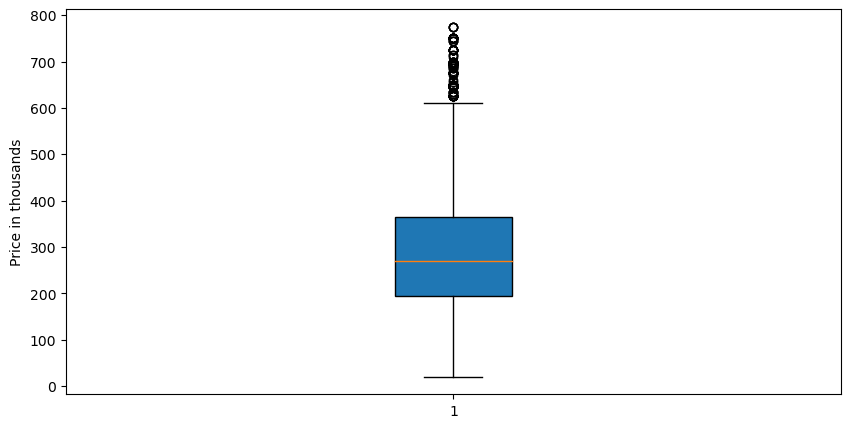

In [12]:
prices_boxplot = df['price'] / 1000

plt.figure(figsize=(10, 5))
boxplot = plt.boxplot(prices_boxplot, vert=True, patch_artist=True)
plt.ylabel('Price in thousands')
plt.show()


We can see that two boxplots below show the distribution for properties with different number of badrooms and bathrooms. It is seen how price is changing according to the number of rooms.

Text(0.5, 0, 'Number of Bedrooms')

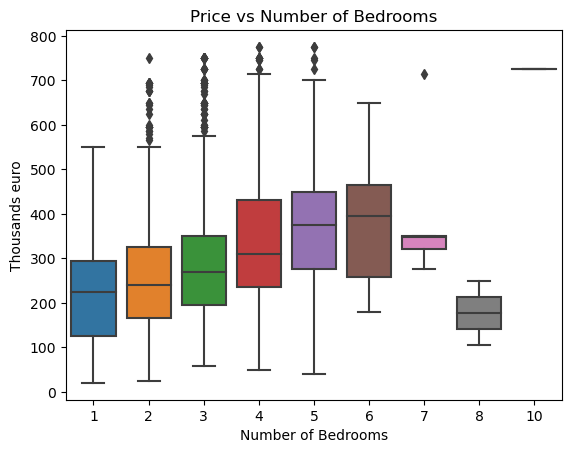

In [14]:
sns.boxplot(df.numBedrooms, prices_boxplot) 
plt.title('Price vs Number of Bedrooms')
plt.ylabel('Thousands euro')
plt.xlabel('Number of Bedrooms')

Text(0.5, 0, 'Number of Bedrooms')

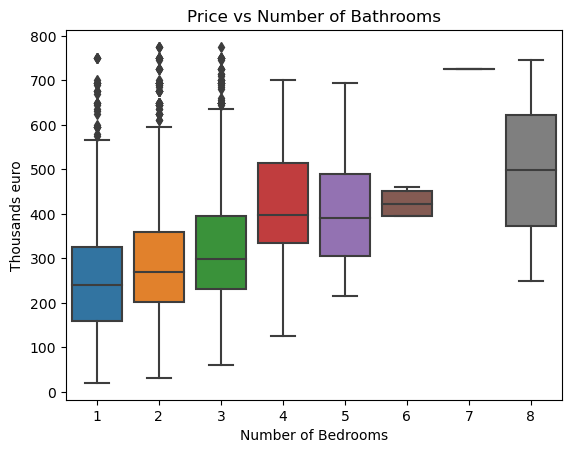

In [15]:
sns.boxplot(df.numBathrooms, prices_boxplot) 
plt.title('Price vs Number of Bathrooms')
plt.ylabel('Thousands euro')
plt.xlabel('Number of Bedrooms')

As we can see the avarage property size is 100. Additionally, the size for the most properties in range between 75 and 125.


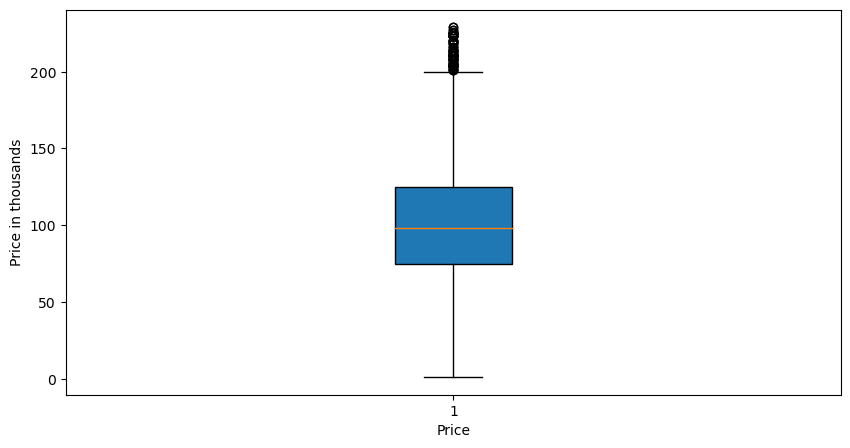

In [11]:
prices_boxplot = df['propertySize']

plt.figure(figsize=(10, 5))
boxplot = plt.boxplot(prices_boxplot, vert=True, patch_artist=True)
plt.ylabel('Property size')
plt.show()

<a id="section9"></a>
### Histograms

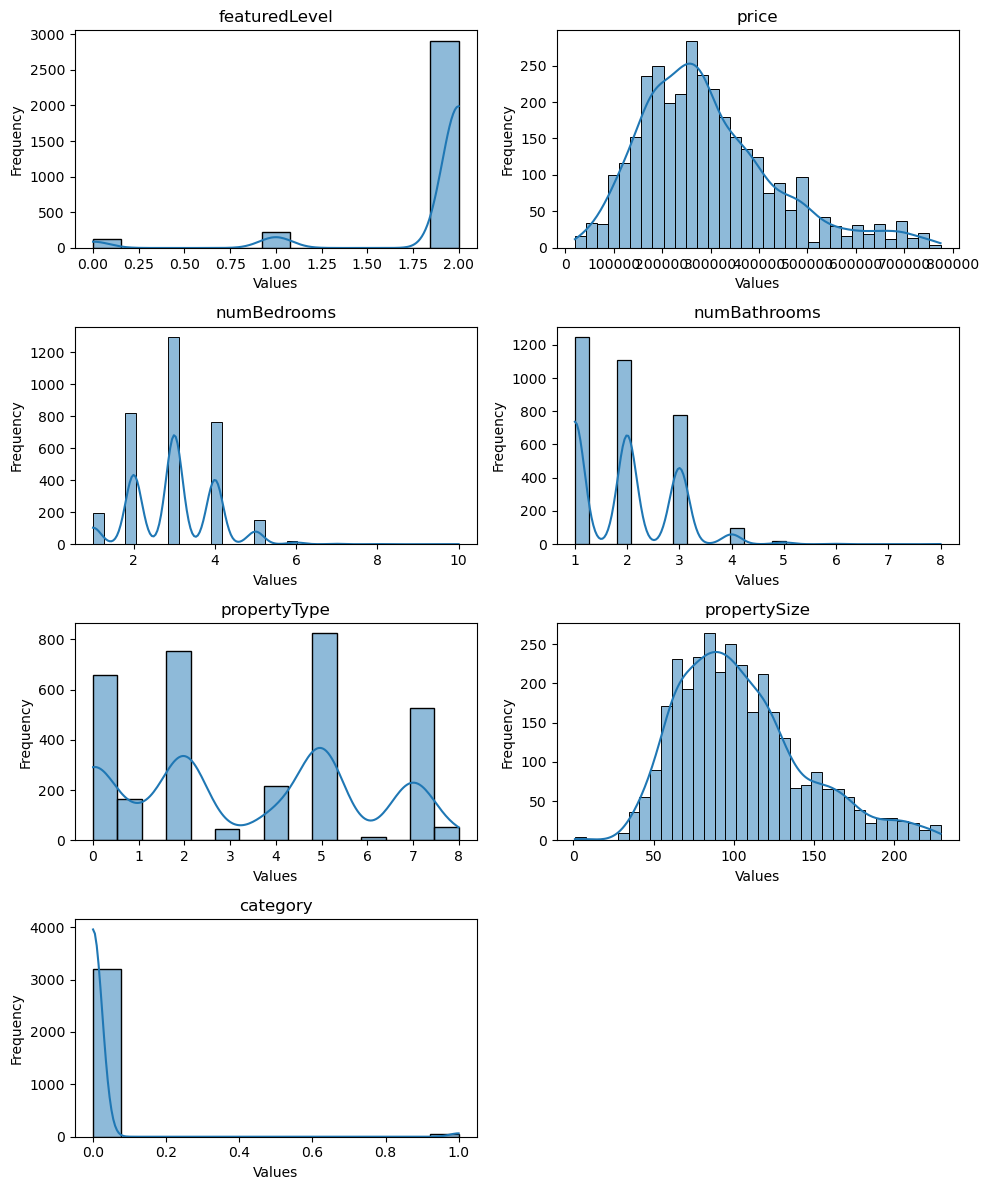

In [25]:
numeric_index = [2, 4, 5, 6, 7, 8, 9]
selected_columns = df.iloc[:, numeric_index]

num_cols = 2  

num_features = len(numeric_index)
num_rows = (num_features - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))

axes = axes.flatten()

for i, col_index in enumerate(numeric_index):
    ax = axes[i]
    col_name = df.columns[col_index]
    sns.histplot(df.iloc[:, col_index], ax=ax, kde=True)
    ax.set_title(col_name)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

<a id="section10"></a>
### Heatmap

A heatmap shows correlation between all values in dataset. We can see that there are 4 feachers which have biggest impact on our target variable "price" such as number of bedrooms, number of bathrooms and property size.


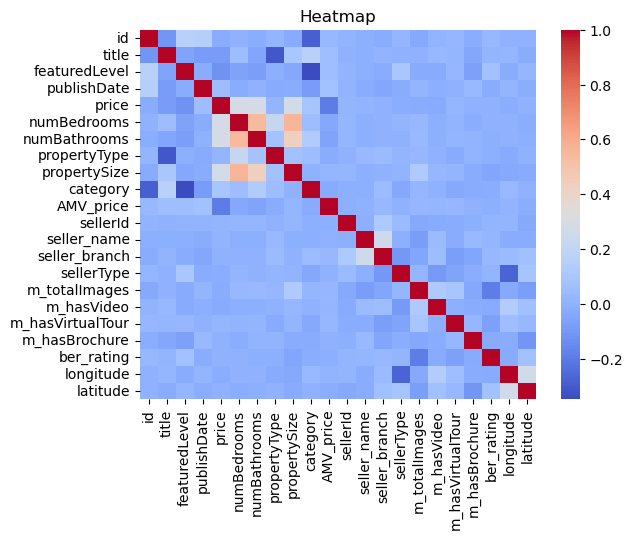

In [24]:
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title('Heatmap')
plt.show()

<p style="text-align: right;">Words in EDA section: 178 </p>

<a id="section11"></a>
## Data preparation

<a id="section12"></a>
#### Drop missing values

In [3]:
df = df.dropna()

In [297]:
df.isnull().sum()

id                  0
title               0
featuredLevel       0
publishDate         0
price               0
numBedrooms         0
numBathrooms        0
propertyType        0
propertySize        0
category            0
AMV_price           0
sellerId            0
seller_name         0
seller_branch       0
sellerType          0
m_totalImages       0
m_hasVideo          0
m_hasVirtualTour    0
m_hasBrochure       0
ber_rating          0
longitude           0
latitude            0
dtype: int64

<a id="section13"></a>
#### Outliers

##### Define percentage of dataset we want to keep which doesn't include outliers, in this case we keep 95% and cut just 5% whith outliers.

In [4]:
outlier = df.price.quantile(0.95)
df = df.loc[df.price < outlier, :]

<AxesSubplot:xlabel='price', ylabel='Density'>

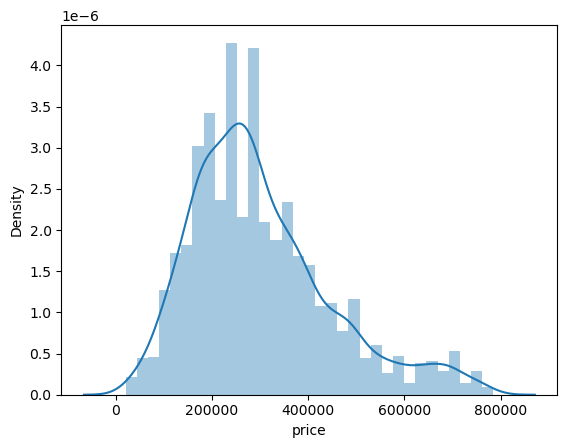

In [229]:
sns.distplot(df.price)

<AxesSubplot:xlabel='propertySize', ylabel='Density'>

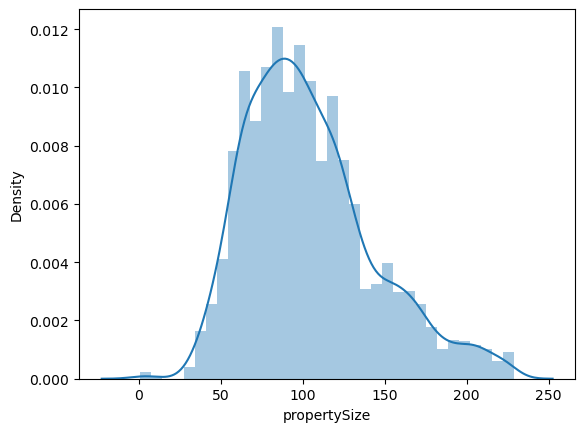

In [232]:
sns.distplot(df.propertySize)

In [10]:
outlier = df.propertySize.quantile(0.95)
df = df.loc[df.propertySize < outlier, :]


<a id="section14"></a>
#### Encoding

In [23]:
label_encoder = LabelEncoder()
df_encoded = df

df_encoded['title'] = label_encoder.fit_transform(df['title'])
df_encoded['featuredLevel'] = label_encoder.fit_transform(df['featuredLevel'])
df_encoded['propertyType'] = label_encoder.fit_transform(df['propertyType'])
df_encoded['publishDate'] = label_encoder.fit_transform(df['publishDate'])
df_encoded['category'] = label_encoder.fit_transform(df['category'])
df_encoded['seller_name'] = label_encoder.fit_transform(df['seller_name'])
df_encoded['seller_branch'] = label_encoder.fit_transform(df['seller_branch'])
df_encoded['sellerType'] = label_encoder.fit_transform(df['sellerType'])
df_encoded['m_hasVideo'] = label_encoder.fit_transform(df['m_hasVideo'])
df_encoded['m_hasVirtualTour'] = label_encoder.fit_transform(df['m_hasVirtualTour'])
df_encoded['m_hasBrochure'] = label_encoder.fit_transform(df['m_hasBrochure'])
df_encoded['ber_rating'] = label_encoder.fit_transform(df['ber_rating'])
df_encoded['longitude'] = label_encoder.fit_transform(df['longitude'])
df_encoded['latitude'] = label_encoder.fit_transform(df['latitude'])

<a id="section15"></a>
## PCA

#### Scale dataset

In [301]:
df_scaled = scaler.fit_transform(df_encoded)

#### Create pca object

In [302]:
pca = PCA()
pca.fit(df_scaled)
pca_data = pca.transform(df_scaled)

#### Plot varietion ratio for each component

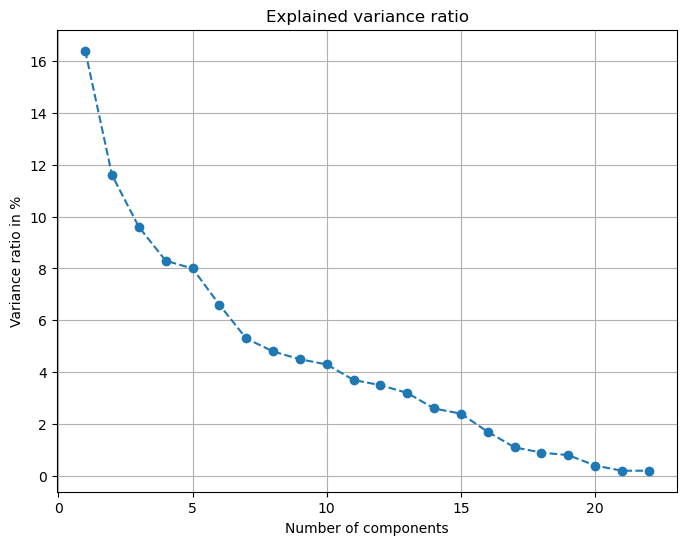

In [303]:
variations = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range (1, len(variations)+1)]

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(variations) + 1), 
         variations, marker='o', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Variance ratio in %')
plt.title('Explained variance ratio')
plt.grid(True)
plt.show()

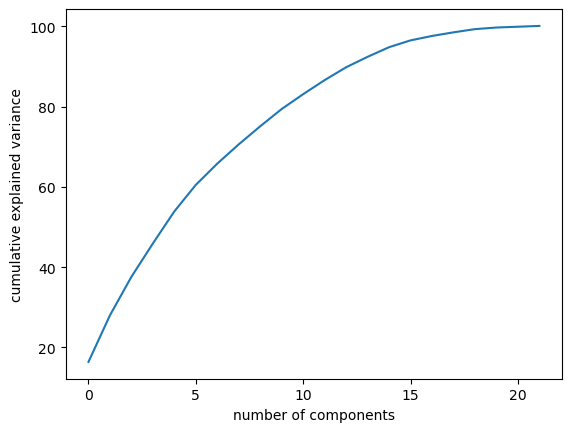

In [304]:
plt.plot(np.cumsum(variations)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');

#### Calculate number of features which represent a sample with selected accuracy 

In [305]:
variance_ratio_percentage = 95
variance_ratio = np.cumsum(variations)
num_components = np.argmax(variance_ratio >= variance_ratio_percentage) + 1
print("Percentage of variance:", variance_ratio_percentage)
print("Number of components:", num_components)

Percentage of variance: 95
Number of components: 16


#### List features and their ratio from calculated number

In [306]:
abs_loadings = np.abs(pca.components_)
importance_scores = np.sum(abs_loadings, axis=0)
variance_ratios = variations

feature_variance = {}
for i, (feature_name, variance_ratio) in enumerate(zip(df.columns, variance_ratios)):
    feature_variance[i, feature_name] = variance_ratio

sorted_feature_variance = dict(sorted(feature_variance.items(), key=lambda item: item[1], reverse=True))

most_important_features = list(sorted_feature_variance.items())[:num_components]

for (index, feature), variance_ratio in most_important_features:
    print(f"Index: {index}, Feature: {feature}, Variance Ratio: {variance_ratio:.1f}%")


Index: 0, Feature: id, Variance Ratio: 16.4%
Index: 1, Feature: title, Variance Ratio: 11.6%
Index: 2, Feature: featuredLevel, Variance Ratio: 9.6%
Index: 3, Feature: publishDate, Variance Ratio: 8.3%
Index: 4, Feature: price, Variance Ratio: 8.0%
Index: 5, Feature: numBedrooms, Variance Ratio: 6.6%
Index: 6, Feature: numBathrooms, Variance Ratio: 5.3%
Index: 7, Feature: propertyType, Variance Ratio: 4.8%
Index: 8, Feature: propertySize, Variance Ratio: 4.5%
Index: 9, Feature: category, Variance Ratio: 4.3%
Index: 10, Feature: AMV_price, Variance Ratio: 3.7%
Index: 11, Feature: sellerId, Variance Ratio: 3.5%
Index: 12, Feature: seller_name, Variance Ratio: 3.2%
Index: 13, Feature: seller_branch, Variance Ratio: 2.6%
Index: 14, Feature: sellerType, Variance Ratio: 2.4%
Index: 15, Feature: m_totalImages, Variance Ratio: 1.7%


***

<a id="section141"></a>
#### Defining a target

In [307]:
X=df_encoded.drop(columns=['price'],axis = 1)
y=df_encoded['price']

<a id="section142"></a>
#### Data scalling

In [308]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1)) 

<a id="section143"></a>
#### Data splitting 

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

***

<a id="section151"></a>
### Hyperparameter Tuning with XDBoost

Each machine learning model has their own parameters by default. Hyperparameter tuning allows us to set multiple values of each parameter thereby creating new modified models. The more parameters the model has the more variation we can create and track the best parameters for our model. As a result, we should get some information about which combination of parameters gives us the best accuracy. So, after we will be able to change the default parameters for our model.

Firstly, let's define XGBoost model.

In [310]:
xgb_model = XGBRegressor(random_state=42)

And set the parameters we want to test. As we can see I have set the:
- 5 values for parameter number of estimators
- 3 values for depth
- 5 values for gamma
Note: parameters for grid search tuning can be found in the documentation for the model in the library website, such as this: https://xgboost.readthedocs.io/en/stable/tutorials/param_tuning.html
As a result, we should get 75 new models.

In [311]:
hyp_params = {
    "n_estimators" : [0.1,1,10,100,1000],
    "max_depth" : [3,4,5],
    "gamma" : [1,0.1,0.01,0.001,0.001]
}

After parametrs for grid search have been set we can create a GridSearch model and include in it XGBoost model with different parameters we set before

In [312]:
GS = GridSearchCV(estimator = xgb_model, 
                  param_grid = hyp_params,
                  scoring = ["r2", 'neg_root_mean_squared_error'],
                  refit = "r2",
                  cv = 5,
                  verbose = 4)

Train the Grid Search model and get report with accuracy for each combination of parameters.

In [313]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END gamma=1, max_depth=3, n_estimators=0.1; neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5] END gamma=1, max_depth=3, n_estimators=0.1; neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5] END gamma=1, max_depth=3, n_estimators=0.1; neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5] END gamma=1, max_depth=3, n_estimators=0.1; neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5] END gamma=1, max_depth=3, n_estimators=0.1; neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5] END gamma=1, max_depth=3, n_estimators=1; neg_root_mean_squared_error: (test=-0.191) r2: (test=0.055) total time=   0.0s
[CV 2/5] END gamma=1, max_depth=3, n_estimators=1; neg_root_mean_squared_error: (test=-0.173) r2: (test=0.058) total time=   0.0s
[CV 3/5] END gamma=1, max_depth=3, n_estima

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
            

Also we can display the best setting and accuracy score for it.

In [315]:
print(GS.best_estimator_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [316]:
print(GS.best_params_)

{'gamma': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [317]:
print(GS.best_score_)

0.20867758599096167


<p style="text-align: right;">Words in Hyperparameter Tuning: 228 </p>

***

<a id="section16"></a>
## Multiple liniar regression 

In this case we are going apply Liniar Regression model for target variable using GridSearch. As I mentioned before most of the models have their own hyperparameter, especially if the models focus on different problems such as Classification or Regression.

In [40]:
model = LinearRegression()

In [41]:
hyp_params = {'fit_intercept': [True, False]}

In [42]:
GS2 = GridSearchCV(estimator = model, 
                  param_grid = hyp_params,
                  scoring = ["r2", 'neg_root_mean_squared_error'],
                  refit = "r2",
                  cv = 5,
                  verbose = 4)

In [43]:
GS2.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END fit_intercept=True; neg_root_mean_squared_error: (test=-132523.136) r2: (test=0.207) total time=   0.1s
[CV 2/5] END fit_intercept=True; neg_root_mean_squared_error: (test=-127775.333) r2: (test=0.146) total time=   0.0s
[CV 3/5] END fit_intercept=True; neg_root_mean_squared_error: (test=-123930.046) r2: (test=0.210) total time=   0.0s
[CV 4/5] END fit_intercept=True; neg_root_mean_squared_error: (test=-128042.760) r2: (test=0.183) total time=   0.0s
[CV 5/5] END fit_intercept=True; neg_root_mean_squared_error: (test=-127389.672) r2: (test=0.133) total time=   0.0s
[CV 1/5] END fit_intercept=False; neg_root_mean_squared_error: (test=-134102.510) r2: (test=0.188) total time=   0.0s
[CV 2/5] END fit_intercept=False; neg_root_mean_squared_error: (test=-128401.313) r2: (test=0.138) total time=   0.0s
[CV 3/5] END fit_intercept=False; neg_root_mean_squared_error: (test=-124113.139) r2: (test=0.208) total time=   0.0s
[

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]}, refit='r2',
             scoring=['r2', 'neg_root_mean_squared_error'], verbose=4)

In [44]:
print(GS2.best_estimator_)

LinearRegression()


In [45]:
print(GS2.best_params_)

{'fit_intercept': True}


In [46]:
print(GS2.best_score_)

0.17586233165784135


#### Cross validation, results test and avarage
Also, very useful tool is cross validation. Generally speaking, it chenges train and test parts thereby displays more accurate R2 score by calculating the mean from all tests.

In [47]:
cv_scores = cross_val_score(model, X, y, cv=10)

print("r2_score per test:", cv_scores)

mean_r2_score = cv_scores.mean()
print("Avarage r2_score:", mean_r2_score)

r2_score per test: [0.11331503 0.24261559 0.0832419  0.23481264 0.10426145 0.09375017
 0.18174136 0.1393357  0.16997269 0.16572329]
Avarage r2_score: 0.15287698171327208


<p style="text-align: right;">Words in Multiple liniar regression: 66 </p>

<a id="refs"></a>

***

<a id="section18"></a>
## Decision Tree (Classifier)

In order to understand how some categorical features correlate with others we are going to test few of them using models for classification.
In this case we will apply Decision Tree Classifier model to predict a categorical feacher "numBedrooms" based on selected features.

#### Feature selection

Because we are focusing on a different target in this model we need to define a new target and split data accordingly.

In [26]:
selected_columns = ['propertySize', 'numBathrooms', 'propertyType', 'price', 'category']
X = df[selected_columns]
y = df.numBedrooms

#### Split data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### Create a model and train it

In [28]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth = 5, random_state = 42)
model_tree = model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6441717791411042


In [30]:
X.columns.tolist()

['propertySize', 'numBathrooms', 'propertyType', 'price', 'category']

In [31]:
df['numBedrooms'].unique().tolist()

[3, 4, 2, 5, 6, 1, 7, 8, 10]

#### Test prediction

In [32]:
model_tree.predict([[162, 4, 6, 300000, 0]])

array([4])

#### Visualisation Tree

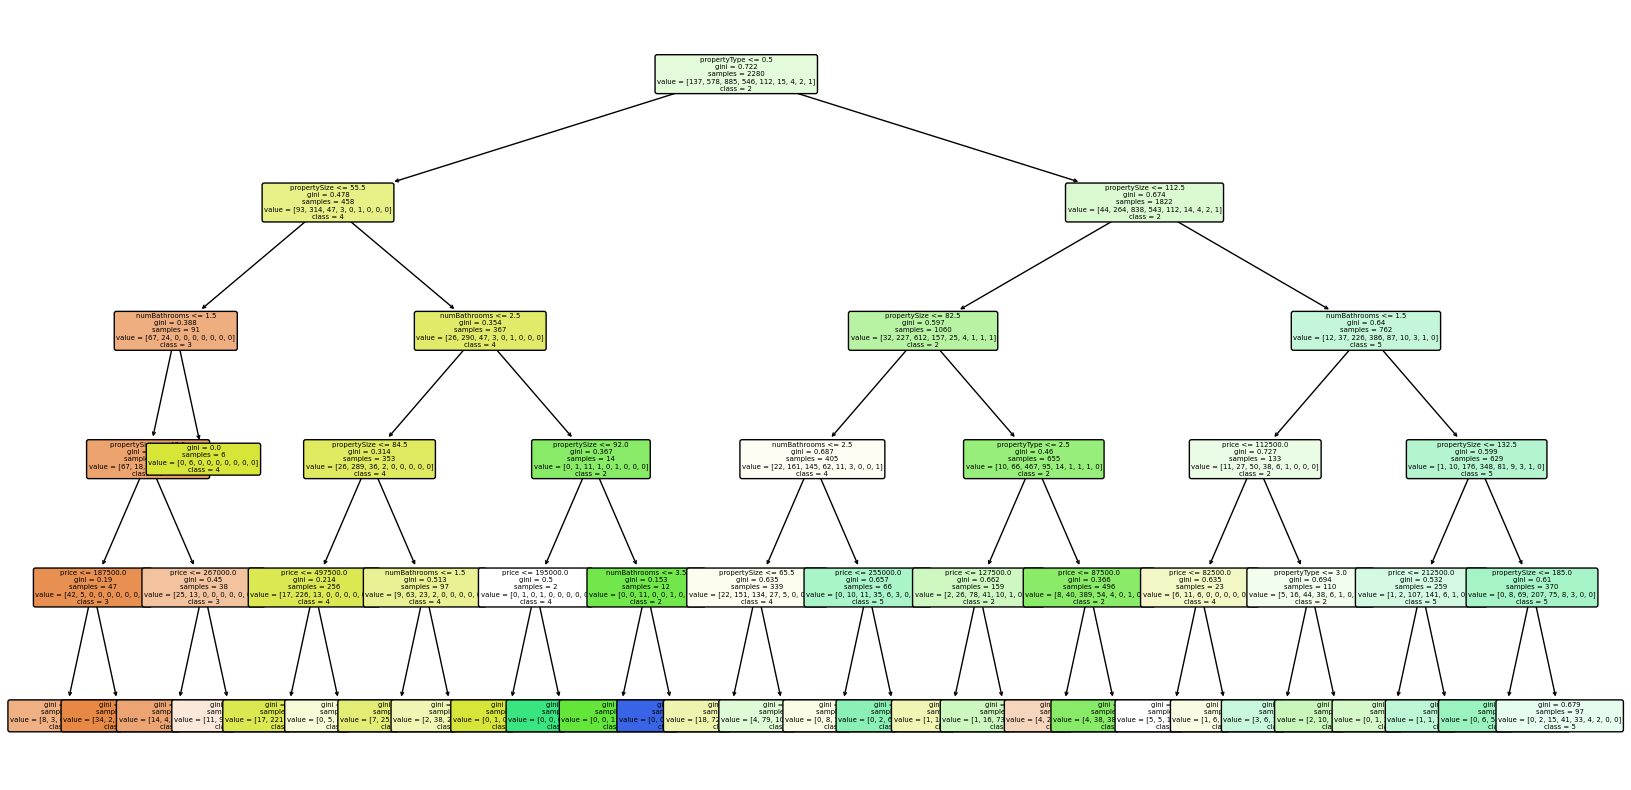

In [33]:
plt.figure(figsize=(20, 10))
plot_tree(model_tree, filled=True, feature_names=X.columns.tolist(), class_names=[str(label) for label in df['numBedrooms'].unique()], rounded=True, fontsize=5)
plt.show()

#### Visualisation Confusion matrix

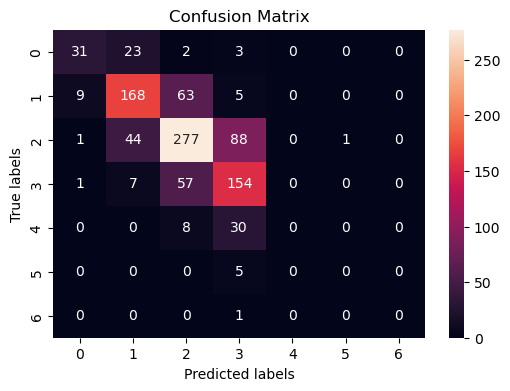

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.53      0.61        59
           2       0.69      0.69      0.69       245
           3       0.68      0.67      0.68       411
           4       0.54      0.70      0.61       219
           5       0.00      0.00      0.00        38
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         1

    accuracy                           0.64       978
   macro avg       0.38      0.37      0.37       978
weighted avg       0.63      0.64      0.63       978



In [34]:
y_predict = model_tree.predict(X_test)

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_test, y_predict)
print("Classification Report:")
print(report)

<p style="text-align: right;">Words in Decision Tree (Classifier): 67 </p>

***

<a id="section19"></a>
## Decision Tree (Regressor)

To predict price of properties based on selected features we are going to use the same decision tree algorithm but this time with regressor model due to our target variable is continuous.

In [35]:
X=df_encoded.drop(columns=['price'],axis = 1)
y=df_encoded['price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [48]:
model_tree2 = DecisionTreeRegressor(max_depth = 5, random_state = 42)

model_tree2.fit(X_train, y_train)

y_pred = model_tree2.predict(X_test)

print("R-squared:", mean_r2_score)


R-squared: 0.15287698171327208


#### Visualisation Tree

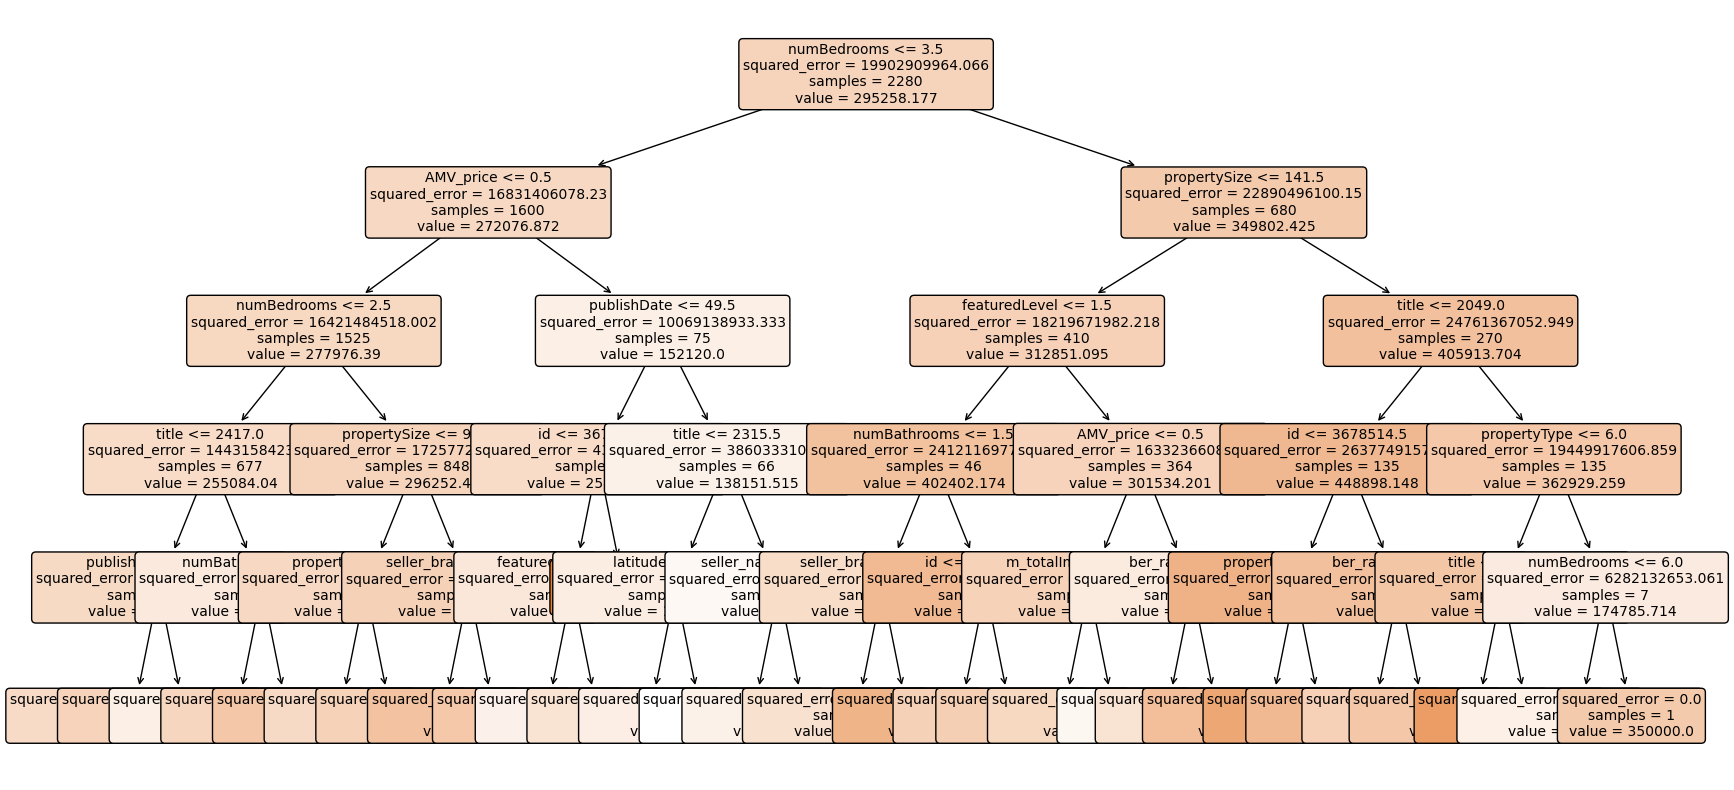

In [364]:
plt.figure(figsize=(20, 10))
plot_tree(model_tree2, filled=True, feature_names=X.columns.tolist(), class_names=[str(label) for label in df['price'].unique().tolist()], rounded=True, fontsize=10)
plt.show()

<p style="text-align: right;">Words in Decision Tree (Regressor): 32 </p>

***

<a id="section20"></a>
## Support Vector Machine

#### Feature selection

In [49]:
selected_columns = ['propertySize', 'price', 'propertyType', 'numBathrooms', 'category']
X = df[selected_columns]
y = df.numBedrooms

#### Split data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### Create a model and train it

In [51]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        59
           2       0.47      0.07      0.12       245
           3       0.44      0.93      0.60       411
           4       0.44      0.16      0.23       219
           5       0.00      0.00      0.00        38
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         1

    accuracy                           0.44       978
   macro avg       0.19      0.17      0.14       978
weighted avg       0.40      0.44      0.33       978



<AxesSubplot:>

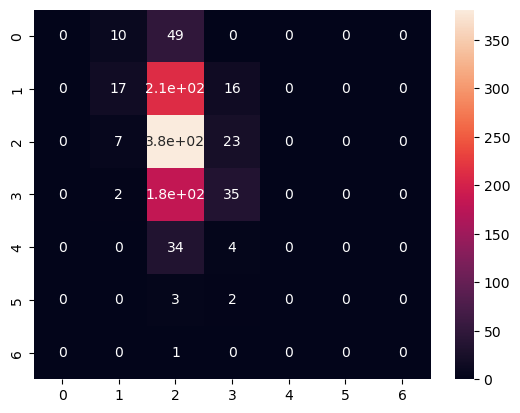

In [52]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))
sns.heatmap(cm, annot=True)

#### Test prediction

In [380]:
svc_model.predict([[162, 575000, 6, 3, 0]])

array([4])

As we can see accuracy, micro average and weighted average have risen. Basically, we can conclude that using selected we are predicting only 51% of our sample. In this case, we defined properties with different numbers of bedrooms as the target variable. The most predictable are properties with 2 and 3 bedrooms.

<p style="text-align: right;">Words in Decision Tree (Regressor): 49 </p>

***

<a id="section21"></a>
## Random forest (Categoric target)

Random Forest is a powerful machine learning algorithm which works by creating multiple decision trees for training and outputs the average prediction for the each tree for regression tasks. The model creates multiple decision trees, and each tree is trained on a random subset of the training data,where each tree gets a random sample of the data with replacement.
Additionally to use a random subset of the data for each tree, Random Forest also introduces randomness in the selection of features to split each node of the decision tree. Instead of considering all features for splitting, it randomly selects a subset of features at each node.

In [64]:
selected_columns = ['propertySize', 'price', 'propertyType', 'numBathrooms', 'category']
X = df[selected_columns]
y = df.numBedrooms
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### Create a model

In [65]:
model_rf = RandomForestClassifier(n_estimators = 1000)

#### Train model and prediction

In [66]:
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

In [67]:
df.head()

,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,m_totalImages,m_hasVideo,m_hasVirtualTour,m_hasBrochure,ber_rating,longitude,latitude
0,3626025,178,0,50,290000,3,3,4,96.0,0,...,1058,199,0,16.0,0,0,0,7,891,94
1,3675175,1732,0,50,225000,3,2,6,93.0,0,...,754,777,0,33.0,0,0,0,6,1573,1188
2,3673450,495,0,49,575000,4,3,6,162.0,0,...,844,475,0,38.0,0,1,0,2,2379,1374
4,3643947,1592,0,50,120000,3,1,9,68.0,0,...,993,621,0,5.0,0,0,0,14,1761,2981
5,3598816,1978,0,52,400000,4,3,6,113.0,0,...,881,671,0,20.0,1,0,0,6,626,168


#### Evaluating the model

In [68]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.724105461393597
R-squared: 0.3894617070712809


#### Test prediction

In [69]:
model_rf.predict([[162, 575000, 6, 3, 0]])

array([4])

<p style="text-align: right;">Words in  Random forest (Categoric target): 75 </p>

***

<a id="section22"></a>
## Random forest (Numerical target)

In [385]:
X=df_encoded.drop(columns=['price'],axis = 1)
y=df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### Create Random Forest regressor

In [386]:
model_rf2 = RandomForestRegressor(n_estimators=1000, random_state=42)

#### Train model and prediction

In [387]:
model_rf2.fit(X_train, y_train)
y_pred = model_rf2.predict(X_test)

#### Evaluating the model

In [388]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 17160048535.021908
R-squared: 0.1748829972673075


***

<a id="section23"></a>
## K-nearest neighbors

When making a prediction for a new data point, KNN calculates the distance between the new data point and all other data points in the training set. The most common distance metric used is Euclidean distance, but other distance metrics can also be used depending on the problem.

In [53]:
X=df_encoded.drop(columns=['price'],axis = 1)
y=df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error", mse)
print("R-squared", r2)


Mean Squared Error 40085091917.17792
R-squared -0.9661081495146358


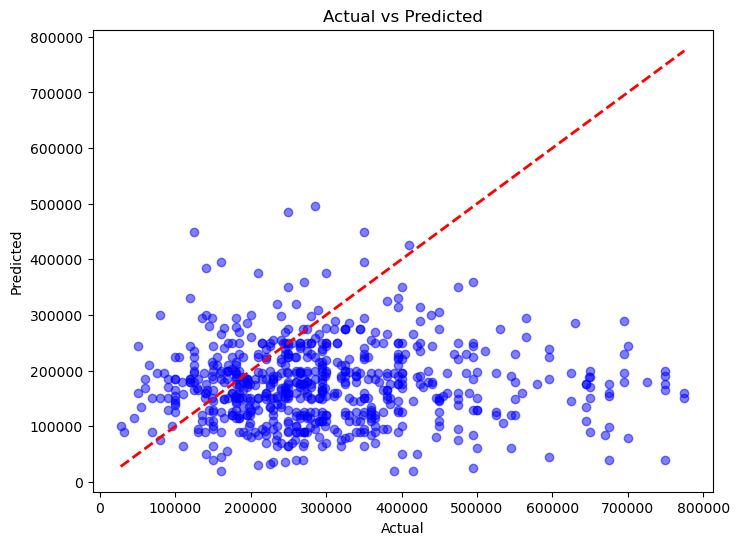

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<p style="text-align: right;">Words in  KNN: 48 </p>
<p style="text-align: right;">Total words: 1263 </p>

***

<a id="section99"></a>
# References 

1. Nowlan, B., (2015). Housing Supply in Ireland: Perennial Problems and Sustainable Solutions. Sunday Business Property Conference Paper 25.09.15
2. Scuffil, C., (2022). Dublin’s Housing Crisis in Troubled Times. Dublin City Council Libraries Blog. Accessed on 03.09.22 at https://www.dublincity.ie/library/blog/dublins-housing-crisis-troubled-times
3. Phan, T. D. (2019) ‘Housing price prediction using machine learning algorithms: The case of Melbourne city, Australia’, Proceedings - International Conference on Machine Learning and Data Engineering, iCMLDE 2018. IEEE, pp. 8–13. DOI: 10.1109/iCMLDE.2018.00017.
4. Norris, M. & Byrne, M. (2017) A tale of two busts (and a boom): Irish social housing before and after the global financial crisis, Critical Housing Analysis, 4, pp. 19–28.
5. Nowicki, M., Brickell, K. & Harris, E. (2019) The hotelisation of the housing crisis: Experiences of family homelessness in Dublin hotels, The Geographical Journal, 185, pp. 313–324.
6. Byrne, M. (2020) Generation rent and the financialization of housing: A comparative exploration of the growth of the private rental sector in Ireland, the UK and Spain, Housing Studies, 35, pp. 743–765.
7. Bourassa, S. C., Cantoni, E. and Hoesli, M. (2011) ‘Predicting House Prices with Spatial Dependence:Impacts of Alternative Submarket Definitions’, SSRN Electronic Journal. DOI: 10.2139/ssrn.1090147.
8. Aswin S. R (2017), ‘Real Estate Price Prediction Using Machine Learning’ https://norma.ncirl.ie/3096/1/aswinsivamravikumar.pdf
9. Hujia Yu and Jiafu Wu., (2016), ' Real Estate Price Prediction with Regression and Classification' https://cs229.stanford.edu/proj2016/report/WuYu_HousingPrice_report.pdf
10. Ng, A. (2015). Machine Learning for a London Housing Price Prediction Mobile Application. Imperial College London. http://www.doc.ic.ac.uk/~mpd37/theses/2015_beng_aaron-ng.pdf


***

<a id="git"></a>

### Author: Ilia Grishkin
#### https://github.com/replicant34/Projects.git
### <center>Change log</center>

|  Date | Change Description | Changed By  |  Status |
|---|---|---|---|
| 19.03.2024  | Created title, structure | Ilia  |   |
| 20.03.2024   | Created intoduction | Ilia |  Pushed |
| 21.03.2024   | Created literate review, content| Ilia |  Pushed |
| 22.03.2024   | Add data sourse | Ilia |  Pushed |
| 24.03.2024   | Methods selection | Ilia |  Pushed |
| 24.03.2024   | Liniar regressions | Ilia |  Pushed |
| 24.03.2024   | SVM | Ilia |  Planned |
| 24.03.2024   | Random forest | Ilia |  Pushed |
| 31.03.2024   | GridSearchCV | Ilia |  Pushed |
| 01.04.2024   | KNN | Ilia |  Pushed |